In [1]:
import numpy as np
import scipy as sp  
import sys, json, os
import pickle
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt

sys.path.append('../../')
from project.recoil import Electron as El
from project.recoil import Nuclear as Nr
from project.recoil import p50, get_vdf_ert

In [2]:
MWdict = pickle.load(open('../../Output/MW_dict.pkl','rb'))
MWlike = pickle.load(open('../../Output/MWlike_dict.pkl','rb'))
mwld = MWlike['vdf_RCfit']
mwd = mwld['MW']
mwp = MWdict['vdf_PBRCfit']
mwgals = MWlike['mwgals']

### Example: Standard Halo Model

In [3]:
vgal = np.linspace(1e-5,1e3,1000)
fshm = np.exp(-(vgal/220)**2)
fshm[vgal>544.] = 0
fgal = vgal**2 * fshm
fgal = fgal/np.trapz(fgal,vgal)
vE= np.linspace(1e-5,1000,1000)
fE = get_vdf_ert(vE, vgal, fgal, 544., 220.)

el = El('Si', vE, fE, 544., 220., 0.4)
Ee = np.linspace(0,49,50)

In [4]:
%%time
rate_sg = el.diffSg(10, 1e-37, Ee)
rate_bg = el.diffBg(1., Ee)
rate_tot = el.diffTot(10., 1e-37, 1., Ee)

CPU times: user 3.35 s, sys: 4.73 ms, total: 3.36 s
Wall time: 3.36 s


AttributeError: 'Axes' object has no attribute 'tickparams'

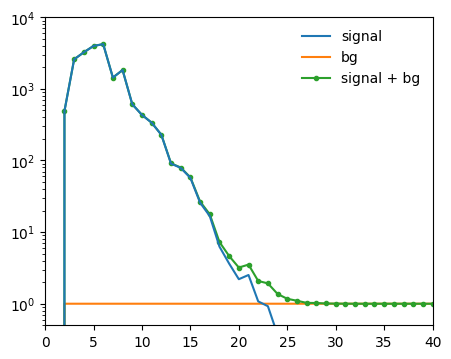

In [18]:
fig, ax = plt.subplots(figsize = (5,4))

ax.plot(Ee, rate_sg, label='signal', zorder=1)
ax.plot(Ee, rate_bg, label='bg', zorder=0)
ax.plot(Ee, rate_tot, marker='.', label='signal + bg', zorder=0)
ax.legend(loc='upper right', frameon=False)

ax.set_yscale('log')
ax.set_ylim(5e-1,1e4)
ax.set_xlim(0,40)
ax.tickparams(which='both', direction='in', top=True, right=True)

ax.set_xlabel('$E_e$ (eV)')
ax.set_ylabel('$dR/dE_e \, (\mathrm{kg\, yr\, keV})^{-1}$')
ax.text(25.5, 2e2, '$m = 10$ MeV, \n$\sigma = 10^{-37}\, \mathrm{cm^{-2}}$')
ax.set_title('Differential recoil plot');
plt.savefig('../../Output/figures/recoil/el_diff_recoil.png', bbox_inches='tight', dpi=300)

In [6]:
bint_sg = el.binTot(10, 1e-37, bl=0, binwidth=3.8)
bint_bg = el.binTot(10, 0., bl=1, binwidth=3.8)
bint_tot = el.binTot(10, 1e-37, bl=1, binwidth=3.8)

NameError: name 'bint_sg' is not defined

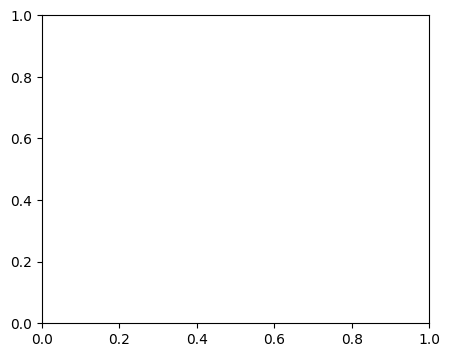

In [14]:
fig, ax = plt.subplots(figsize=(5,4))
ax.step(bint_sg['E_edges'], bint_sg['Neachbin'], where='post', label='signal')
ax.step(bint_bg['E_edges'], bint_bg['Neachbin'], where='post', label='bg')
ax.step(bint_tot['E_edges'], bint_tot['Neachbin'], where='post', label='signal + bg')
ax.legend(loc = 'upper right', frameon=False)

ax.set_yscale('log')
ax.set_ylim(1e0,5e5)
ax.set_xlim(0,40)
ax.set_xlabel('$E_e$ (eV)')
ax.set_ylabel('$\Delta E_e \, dR/dE_e \, (\mathrm{kg\, yr})^{-1}$')
plt.savefig('../../Output/figures/recoil/el_rate_spectrum.png', bbox_inches='tight', dpi=300)

In [ ]:
mwd.keys()
mwp = MWlike['vdf']

dict_keys(['v', 'vdfs', 'vdf_16', 'vdf_50', 'vdf_84', 'vdfE_16', 'vdfE_50', 'vdfE_84', 'vE', 'vdfEs', 'vescs', 'vcircs', 'vescRs', 'rhosuns', 'full_pdfs', 'full_samp', 'full_indxs', 'full_sampN', 'par_pdfs', 'par_samp', 'par_indxs', 'par_sampN'])

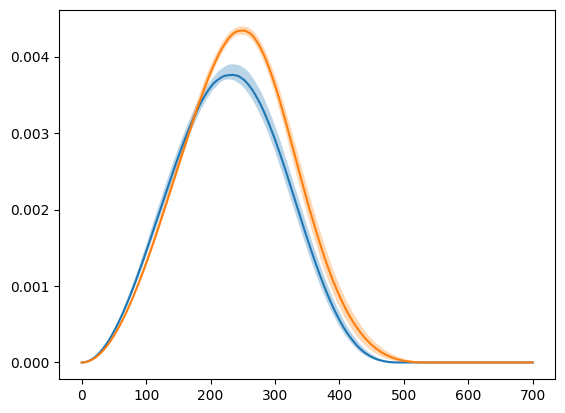

In [12]:
plt.plot(mwd['v'], mwd['vdf_50'])
plt.fill_between(mwd['v'], mwd['vdf_16'], mwd['vdf_84'], alpha=0.3)
plt.plot(mwp['v'], mwp['vdf_50'])
plt.fill_between(mwp['v'], mwp['vdf_16'], mwp['vdf_84'], alpha=0.3)